In [36]:

# Install required libraries
# Import required libraries
import random
import math
import gymnasium as gym
from gymnasium import spaces
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import namedtuple, deque
from itertools import count
import tensorflow as tf
import keras
# print("Num CPUs Available: ", tf.config.experimental.list_physical_devices('CPU'))

# device = torch.device(
#     "cuda" if torch.cuda.is_available() else
#     "cpu"
# )

# print(device)
# CUDA_LAUNCH_BLOCKING=1

In [37]:
def DQN(obs, actions):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32, input_dim=obs, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(actions, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae']) #auto learning rate
    return model

class Agent:
    def __init__(self, obs, actions):

        self.actions = actions
        self.discount_factor = 0.99 #gamma
        self.epsilon = 1
        self.epsilon_decay = 0.9954
        self.epsilon_min = 0.01
        self.batch_size = 128
        self.size = 5000
        self.state_mem = np.zeros((self.size,obs))
        self.next_state_mem = np.zeros((self.size,obs))
        self.action_mem = np.zeros(self.size, dtype = int )
        self.reward_mem = np.zeros(self.size)
        self.done_mem = np.zeros(self.size,dtype=np.float32)
        self.pointer = 0
        self.policy_net = DQN(obs, actions)
        self.target_net = DQN(obs, actions) 

    def append(self, state, action, reward, next_state, done):
        i = self.pointer % self.size #get index
        self.state_mem[i] = state
        self.next_state_mem[i] = next_state
        self.reward_mem[i] = reward 
        self.done_mem[i] = done
        self.action_mem[i] = action
        self.pointer +=1

    def sample(self,batch):
        mem = min(self.pointer,self.size) # get range to choose mem from
        batch = np.random.choice(mem,batch) # choose random indices
        states = self.state_mem[batch]
        next_states = self.next_state_mem[batch]
        actions = self.action_mem[batch]
        rewards = self.reward_mem[batch]
        done = self.done_mem[batch]
        return states, actions, rewards, next_states, done
    
    def select_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.actions)  # random action
        state = state[np.newaxis,:]
        q_values = self.policy_net.predict(state, verbose=0)
        return np.argmax(q_values)  # best action

    def replay(self):
        if self.pointer < self.batch_size:
            return
        # print("learn god damn it")
        state, action, reward, next_state, done = self.sample(self.batch_size)

        # estimate cuurent q values
        q_eval = self.policy_net.predict(state,verbose = 0)
        # set target values
        q_next = self.target_net.predict(next_state, verbose = 0)
        q_target = q_eval.copy()
        batch_index = np.arange(self.batch_size, dtype=np.int32)
        # print('batch',batch_index)
        # print(action)
        q_target[batch_index,action] = reward + self.discount_factor *np.max(q_next,axis=1) *done

        self.policy_net.fit(state, q_target, verbose=0,)
        return
        


Episode: 0, Timesteps: 20
Episode: 1, Timesteps: 18


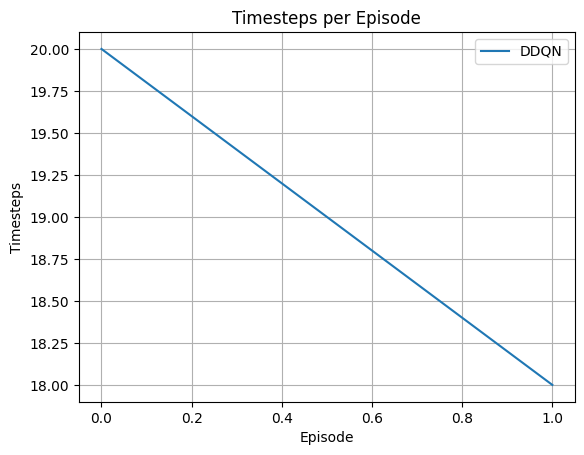

Episode: 2, Timesteps: 12
Episode: 3, Timesteps: 11
Episode: 4, Timesteps: 24
Episode: 5, Timesteps: 10
Episode: 6, Timesteps: 13
Episode: 7, Timesteps: 43
Episode: 8, Timesteps: 17
Episode: 9, Timesteps: 11
Episode: 10, Timesteps: 20
Episode: 11, Timesteps: 8
Episode: 12, Timesteps: 14
Episode: 13, Timesteps: 39
Episode: 14, Timesteps: 40
Episode: 15, Timesteps: 25
Episode: 16, Timesteps: 61
Episode: 17, Timesteps: 44
Episode: 18, Timesteps: 14
Episode: 19, Timesteps: 13
Episode: 20, Timesteps: 16
Episode: 21, Timesteps: 12
Episode: 22, Timesteps: 10
Episode: 23, Timesteps: 24
Episode: 24, Timesteps: 28
Episode: 25, Timesteps: 11
Episode: 26, Timesteps: 22
Episode: 27, Timesteps: 15
Episode: 28, Timesteps: 12
Episode: 29, Timesteps: 11
Episode: 30, Timesteps: 32
Episode: 31, Timesteps: 12
Episode: 32, Timesteps: 12
Episode: 33, Timesteps: 13
Episode: 34, Timesteps: 28
Episode: 35, Timesteps: 17
Episode: 36, Timesteps: 43
Episode: 37, Timesteps: 13
Episode: 38, Timesteps: 13
Episode: 3

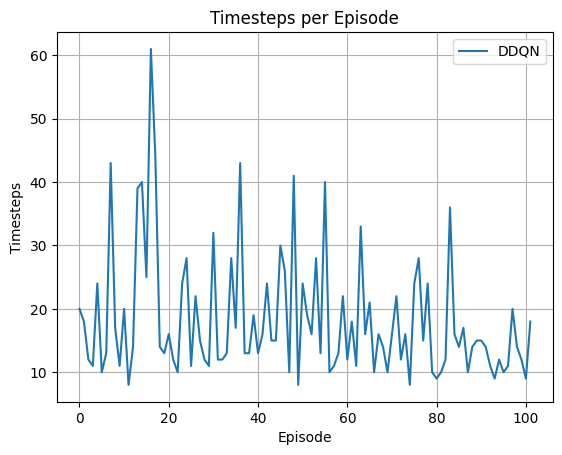

Episode: 102, Timesteps: 22
Episode: 103, Timesteps: 32
Episode: 104, Timesteps: 19
Episode: 105, Timesteps: 9
Episode: 106, Timesteps: 13
Episode: 107, Timesteps: 9
Episode: 108, Timesteps: 17
Episode: 109, Timesteps: 13
Episode: 110, Timesteps: 13
Episode: 111, Timesteps: 14
Episode: 112, Timesteps: 12
Episode: 113, Timesteps: 18
Episode: 114, Timesteps: 21
Episode: 115, Timesteps: 19
Episode: 116, Timesteps: 8
Episode: 117, Timesteps: 20
Episode: 118, Timesteps: 10
Episode: 119, Timesteps: 19
Episode: 120, Timesteps: 19
Episode: 121, Timesteps: 27
Episode: 122, Timesteps: 11
Episode: 123, Timesteps: 12
Episode: 124, Timesteps: 14
Episode: 125, Timesteps: 9
Episode: 126, Timesteps: 26
Episode: 127, Timesteps: 12
Episode: 128, Timesteps: 36
Episode: 129, Timesteps: 14
Episode: 130, Timesteps: 8
Episode: 131, Timesteps: 11
Episode: 132, Timesteps: 10
Episode: 133, Timesteps: 10
Episode: 134, Timesteps: 11
Episode: 135, Timesteps: 8
Episode: 136, Timesteps: 12
Episode: 137, Timesteps: 1

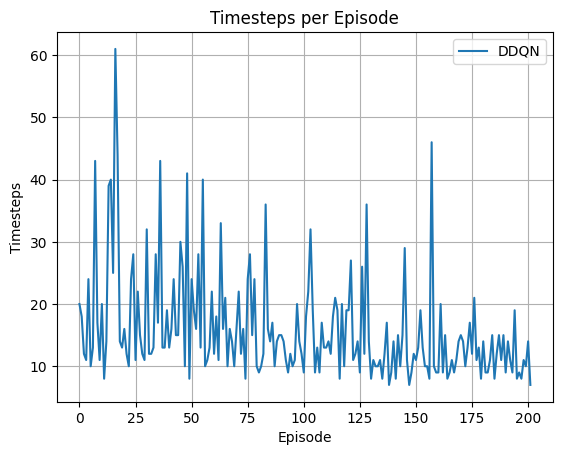

Episode: 202, Timesteps: 8
Episode: 203, Timesteps: 17
Episode: 204, Timesteps: 11
Episode: 205, Timesteps: 9
Episode: 206, Timesteps: 13
Episode: 207, Timesteps: 13
Episode: 208, Timesteps: 10
Episode: 209, Timesteps: 9
Episode: 210, Timesteps: 8
Episode: 211, Timesteps: 8
Episode: 212, Timesteps: 52
Episode: 213, Timesteps: 12
Episode: 214, Timesteps: 11
Episode: 215, Timesteps: 11
Episode: 216, Timesteps: 8
Episode: 217, Timesteps: 15
Episode: 218, Timesteps: 9
Episode: 219, Timesteps: 11
Episode: 220, Timesteps: 10
Episode: 221, Timesteps: 10
Episode: 222, Timesteps: 8
Episode: 223, Timesteps: 12
Episode: 224, Timesteps: 8
Episode: 225, Timesteps: 8
Episode: 226, Timesteps: 8
Episode: 227, Timesteps: 9
Episode: 228, Timesteps: 9
Episode: 229, Timesteps: 16
Episode: 230, Timesteps: 9
Episode: 231, Timesteps: 9
Episode: 232, Timesteps: 10
Episode: 233, Timesteps: 12
Episode: 234, Timesteps: 11
Episode: 235, Timesteps: 12
Episode: 236, Timesteps: 13
Episode: 237, Timesteps: 10
Episode

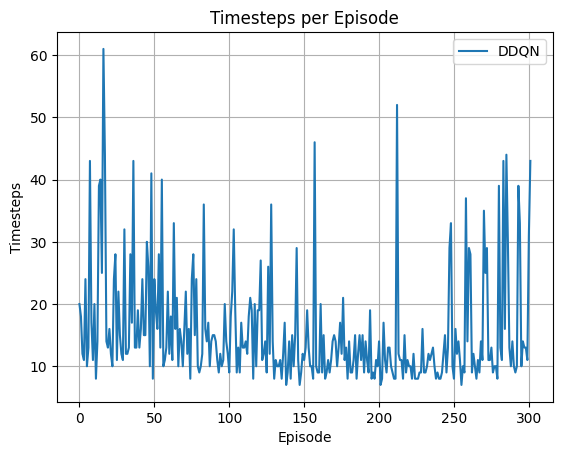

Episode: 302, Timesteps: 12
Episode: 303, Timesteps: 16
Episode: 304, Timesteps: 47
Episode: 305, Timesteps: 34
Episode: 306, Timesteps: 12
Episode: 307, Timesteps: 11
Episode: 308, Timesteps: 10
Episode: 309, Timesteps: 33
Episode: 310, Timesteps: 38
Episode: 311, Timesteps: 12
Episode: 312, Timesteps: 10
Episode: 313, Timesteps: 12
Episode: 314, Timesteps: 38
Episode: 315, Timesteps: 48
Episode: 316, Timesteps: 10
Episode: 317, Timesteps: 11
Episode: 318, Timesteps: 15
Episode: 319, Timesteps: 11
Episode: 320, Timesteps: 14
Episode: 321, Timesteps: 44
Episode: 322, Timesteps: 10
Episode: 323, Timesteps: 11
Episode: 324, Timesteps: 34
Episode: 325, Timesteps: 45
Episode: 326, Timesteps: 16
Episode: 327, Timesteps: 43
Episode: 328, Timesteps: 64
Episode: 329, Timesteps: 31
Episode: 330, Timesteps: 16
Episode: 331, Timesteps: 70
Episode: 332, Timesteps: 11
Episode: 333, Timesteps: 56
Episode: 334, Timesteps: 45
Episode: 335, Timesteps: 14
Episode: 336, Timesteps: 13
Episode: 337, Timest

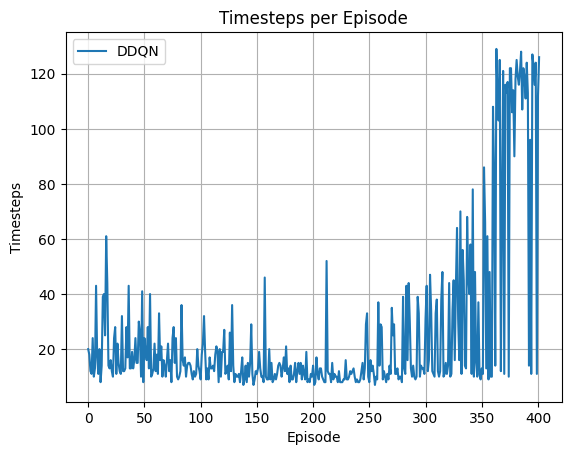

Episode: 402, Timesteps: 114
Episode: 403, Timesteps: 11
Episode: 404, Timesteps: 122
Episode: 405, Timesteps: 112
Episode: 406, Timesteps: 115
Episode: 407, Timesteps: 10
Episode: 408, Timesteps: 12
Episode: 409, Timesteps: 89
Episode: 410, Timesteps: 98
Episode: 411, Timesteps: 111
Episode: 412, Timesteps: 117
Episode: 413, Timesteps: 120
Episode: 414, Timesteps: 118
Episode: 415, Timesteps: 120
Episode: 416, Timesteps: 123
Episode: 417, Timesteps: 57
Episode: 418, Timesteps: 119
Episode: 419, Timesteps: 107
Episode: 420, Timesteps: 111
Episode: 421, Timesteps: 118
Episode: 422, Timesteps: 108
Episode: 423, Timesteps: 98
Episode: 424, Timesteps: 112
Episode: 425, Timesteps: 119
Episode: 426, Timesteps: 122
Episode: 427, Timesteps: 121
Episode: 428, Timesteps: 115
Episode: 429, Timesteps: 115
Episode: 430, Timesteps: 118
Episode: 431, Timesteps: 110
Episode: 432, Timesteps: 114
Episode: 433, Timesteps: 112
Episode: 434, Timesteps: 127
Episode: 435, Timesteps: 108
Episode: 436, Timeste

KeyboardInterrupt: 

In [ ]:

if __name__ == "__main__":
    env = gym.make("CartPole-v1")
    obs = env.observation_space.shape[0]
    actions = env.action_space.n
    agent = Agent(obs, actions)
    max_episodes = 2000
    reward_per_episode = []
    tau = 0.05

    for episode in range(max_episodes):
        state, info = env.reset()
        
        terminated,truncated = False,False
        if episode % 5 == 0:
            target = agent.target_net.get_weights()
            policy = agent.policy_net.get_weights()

            for i in range(len(target)):
                target[i] = tau * policy[i] + (1 - tau) * target[i]

            agent.target_net.set_weights(target)
            # agent.target_net.set_weights(agent.policy_net.get_weights())
        
        for timestep in range(500):
            action = agent.select_action(state)
            # print('action:', action)
            next_state, reward, terminated, truncated, _ = env.step(action)
            result = terminated or truncated
            if terminated == True:
                reward = -1
            if result == True:
                done = 0
            else:
                done = 1
            agent.append(state=state, action=action, reward=reward, next_state=next_state, done=done)
            state = next_state
            if timestep %5 == 0 :
                agent.replay()  # Update network weights
            if result == True:
                reward_per_episode.append(timestep)
                print(f'Episode: {episode}, Timesteps: {timestep}')
                break
        if episode % 100 == True:
            plt.figure()
            plt.plot(reward_per_episode, label='DDQN')
            plt.xlabel('Episode')
            plt.ylabel('Timesteps')
            plt.title('Timesteps per Episode')
            plt.legend()
            plt.grid()
            plt.show()
            # print("saved_weights")
            a= agent.policy_net.get_weights()
            with open('cartweightDDQN.pickle', 'wb') as handle:
                pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)
        agent.epsilon = max(agent.epsilon_min, agent.epsilon * agent.epsilon_decay)

    plt.figure()
    plt.plot(reward_per_episode, label='DQN')
    plt.xlabel('Episode')
    plt.ylabel('Timesteps')
    plt.title('Timesteps per Episode')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
a= agent.policy_net.get_weights()
with open('cartweight.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

